In [225]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#імпорт бібліотек для визначення похибок
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
#імпорт стандартної бібліотеки для обчислення лінійної регресії
from sklearn.linear_model import LinearRegression

In [226]:
df = pd.read_csv('Concrete_Data_Yeh.csv')
df.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [228]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [229]:

df.describe()

cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.705742  
min         801.000000     594.000000     1.000000     2.330000  
25%         932.000000     730.950000     7.000000    23.710000  
50%         968.000000     779.500000    28.000000    34.445000  
75%        1029.400000     824.000000    56.000000    46.135000  
max        1145.000000     992.600000   365.000000    82.600000

In [269]:
#Графік залежностей кожної змінної

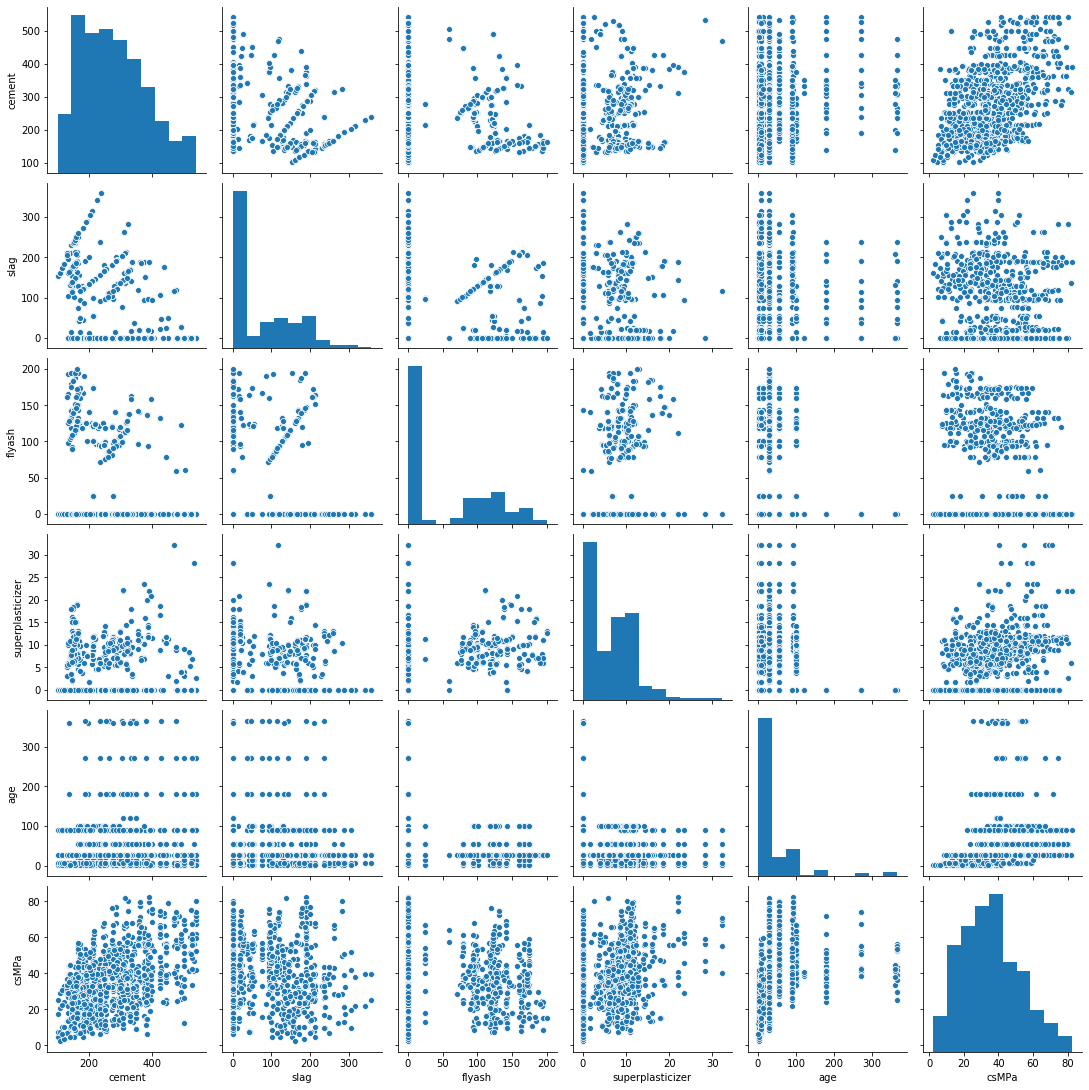

In [270]:
sns.pairplot(df);


In [ ]:
#Коефіцієн кореляції для кожної змінної

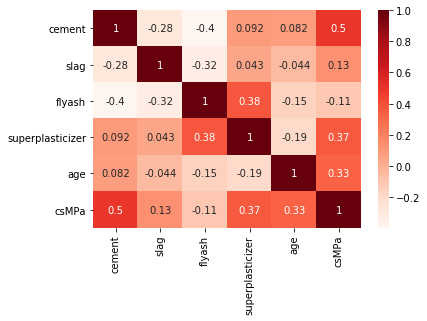

In [271]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [281]:
df = df.drop('fineaggregate', axis=1)
df = df.drop('coarseaggregate', axis=1)
df = df.drop('water', axis=1)

KeyError: "['fineaggregate'] not found in axis"

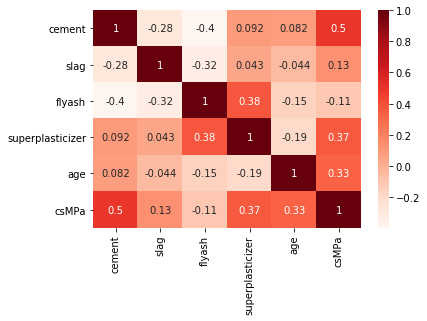

In [275]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [282]:
y = df["csMPa"]
X = df.drop('csMPa', axis = 1)

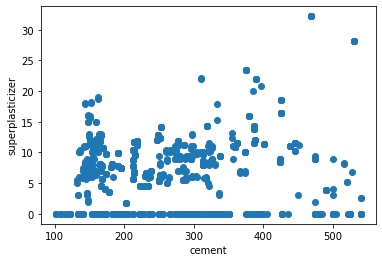

In [283]:
plt.scatter(df['cement'], df['superplasticizer'])
plt.xlabel('cement')
plt.ylabel('superplasticizer')
plt.show()

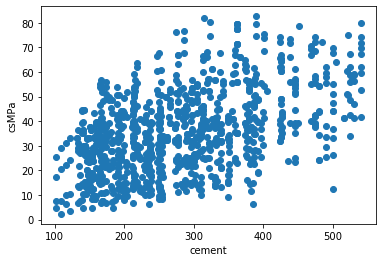

In [284]:
plt.scatter(df['cement'], df['csMPa'])
plt.xlabel('cement')
plt.ylabel('csMPa')
plt.show()

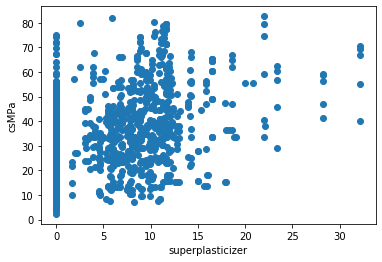

In [285]:
plt.scatter(df['superplasticizer'], df['csMPa'])
plt.xlabel('superplasticizer')
plt.ylabel('csMPa')
plt.show()

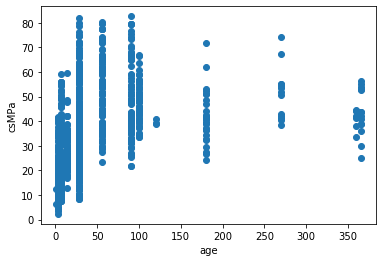

In [286]:
plt.scatter(df['age'], df['csMPa'])
plt.xlabel('age')
plt.ylabel('csMPa')
plt.show()

In [287]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=12)
    return X_train, X_test, y_train, y_test

In [288]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X - набір нормалізованих характеристик
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [289]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [290]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    
    h_thetha = np.dot(X, theta)
    return h_thetha

In [291]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    
    J = 1/(2*m)*sum((hypothesis(X, theta) - y.values)**2)
    
    ######################
    return J

In [292]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    ######################
    d_thetha = np.dot(hypothesis(X, theta) - y.values, X)/m
    ######################
    return d_thetha

In [293]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    theta - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        #
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [294]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(824, 5), y=(824,)
Test set: X=(206, 5), y=(206,)


In [296]:
#Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0):

In [297]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0, 0, 0, 0, 0])

In [299]:
#Для спрощення записів аліас для вектора передбачуваних значень

In [300]:
y = y_train[:]

In [301]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (824, 6)
y: (824,)
786.4860548543695


In [302]:
#Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [303]:
alpha = 0.01
num_iters = 1500

In [304]:
derivative(X, y, theta)

array([-35.88764563,  -8.82867991,  -2.35874764,   2.19050606,
        -5.85925337,  -5.6470513 ])

In [306]:
#Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран.

In [307]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}; Theta 2: {}; Theta 3: {}; Theta 4: {}; Theta 5: {}'.format(new_theta[0], new_theta[1],new_theta[2], new_theta[3], new_theta[4], new_theta[5]))

Theta 0: 35.88763545132373; Theta 1: 10.70294997454216; Theta 2: 6.234715534219851; Theta 3: 3.4029257454963555; Theta 4: 4.5967296392355115; Theta 5: 6.441897056455051


In [308]:
#Оцінка похибки апроксимації на тестових даних

In [309]:
X_test_norm = (X_test - mean)/std
X_test_proc = prepare_X(X_test_norm)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

y_actual     y_pred         err
590     10.34  14.580662   41.012209
244     19.93  24.606068   23.462457
482     56.14  55.598857    0.963918
270     26.77  26.277601    1.839370
586     14.54  29.217580  100.946215
..        ...        ...         ...
865     41.54  36.759716   11.507665
299     22.50  31.918727   41.861010
661     10.39  20.242031   94.822246
450     53.77  30.748327   42.815088
362     61.99  37.187229   40.010923

[206 rows x 3 columns]
58.90921243329233


In [310]:
rmse = mean_squared_error(y_test, y_test_pred)**0.5
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

In [311]:
print('Linear Regression')
print('RMSE   : ', rmse)
print('MSE    : ', mse)
print('MAE    : ', mae)

Linear Regression
RMSE   :  10.854419600632026
MSE    :  117.8184248665847
MAE    :  8.749760684670482


In [312]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_test_pred2 = regressor.predict(X_test)

In [313]:
rmse2 = mean_squared_error(y_test, y_test_pred2)**0.5
mse2 = mean_squared_error(y_test, y_test_pred2)
mae2 = mean_absolute_error(y_test, y_test_pred2)

In [314]:
print('Linear Regression sklearn')
print('RMSE   : ', rmse2)
print('MSE    : ', mse2)
print('MAE    : ', mae2)

Linear Regression sklearn
RMSE   :  10.855743432538825
MSE    :  117.84716547310984
MAE    :  8.749261691913894
